In [1]:
import pandas as pd
import numpy as np
# import seaborn as sns
# import matplotlib
import matplotlib.pyplot as plt
# import random
# import time
# %matplotlib inline
# import matplotlib.animation as animation
# import csv
# matplotlib.style.use('seaborn')

from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction.text import TfidfTransformer
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.decomposition import PCA
# from sklearn import manifold
# from sklearn.cluster import AgglomerativeClustering
# from scipy.cluster import hierarchy
# from sklearn.cluster import DBSCAN
# from sklearn.metrics.pairwise import pairwise_distances
# # from wordcloud import WordCloud
# from sklearn.feature_extraction import text

# from mpl_toolkits.mplot3d import Axes3D

In [2]:
blog_data=pd.read_csv("blogtext.csv")

In [3]:
blog_data.drop_duplicates(subset="text",inplace=True)
blog_data.date = pd.to_datetime(blog_data.date,format="%d,%B,%Y", errors='coerce')#pd.to_datetime(blog_data.date,errors="coerce",infer_datetime_format=True)
print(blog_data.shape)
blog_data.sample(20)

(611652, 7)


,id,gender,age,topic,sign,date,text
389850,1945859,male,25,Arts,Aries,2004-01-05,I'm an agnostic. I don't belive i...
128741,3869310,female,14,Student,Sagittarius,2004-07-14,"hey, im bored. i just woke up..."
141993,3381829,male,38,Environment,Scorpio,2004-05-18,How do we know if our water is clean?)...
633717,1681913,male,26,indUnk,Leo,2004-07-26,"Bacteria Laden Post! Superbore, ..."
100288,3492164,male,16,Non-Profit,Aquarius,2004-06-01,"Age is a measure of time, God is ..."
359336,848630,female,23,indUnk,Cancer,2003-11-01,Movie Review - Kill Bill Vol...
431401,3848343,female,17,Student,Taurus,2004-07-19,WHAT A DAY IT WAS.....i went...
657796,4265311,female,15,indUnk,Leo,2004-08-18,its going to be different THIS TIM...
587357,3532353,male,16,indUnk,Pisces,2004-07-01,Ohh. I spent the last few hours ch...
181751,4254048,female,15,Student,Libra,2004-08-17,How come no one posted anything today ...


In [4]:
####################################################################################################
#####                            Sampling for code develpoment 
#####                            Remove after validating code
####################################################################################################

blog_data=blog_data.sample(frac=.2)#.02

print("******WARNING****** \n DATASET SAMPLED!!!!!!")
print(blog_data.shape)

******WARNING****** 
 DATASET SAMPLED!!!!!!
(122330, 7)


In [5]:
# adit_stpwrds=["urllink","nbsp","ve","ll"]
# stp_wrds = text.ENGLISH_STOP_WORDS.union(adit_stpwrds)

# Word Frequencies
tomar las 1100 más frecuentes y eliminar las 100 primeras

In [6]:
count_vect = CountVectorizer(max_features=150+1000)#,stop_words=stp_wrds)#,ngram_range=(1,2))
n_grams_counts = count_vect.fit_transform(blog_data["text"])#.toarray()
n_grams_counts.shape
#count_vect.get_feature_names()

(122330, 1150)

In [7]:
top_n=650

In [8]:
# plt.figure(figsize=(16,16))
# plt.spy(n_grams_counts,markersize=.5, marker="o",aspect='auto')
# plt.title("Word Frequencies")

txt_info= n_grams_counts.toarray().sum(axis=0)
indices = np.argsort(txt_info)[::-1]
features =count_vect.get_feature_names()
top_features = np.array([[features[i],float(txt_info[i])] for i in indices])#[:top_n]])
print(pd.DataFrame({"word":top_features[:,0],"freq":top_features[:,1]})[:100])

       word      freq
0       the  995104.0
1        to  742349.0
2       and  680547.0
3        of  453995.0
4        it  377944.0
5      that  349389.0
6        in  330723.0
7        my  274994.0
8        is  265747.0
9       you  250025.0
10      for  228119.0
11      was  222538.0
12       on  183366.0
13       me  179231.0
14      but  174403.0
15       so  169890.0
16     this  164015.0
17     with  163473.0
18     have  160469.0
19       we  150708.0
20       be  147475.0
21       at  130797.0
22       he  130537.0
23      not  129112.0
24      all  119099.0
25       as  110298.0
26     like  105280.0
27     just  103874.0
28      are  103847.0
29     they   97495.0
..      ...       ...
70     been   51143.0
71      has   50549.0
72      how   50469.0
73      got   49881.0
74      him   49305.0
75     were   48820.0
76     them   47092.0
77     back   46694.0
78  because   46115.0
79    going   46070.0
80      day   45728.0
81      see   42792.0
82     much   42461.0
83       v

In [9]:
top_features[150:,0]

array(['great', 'though', 'school', 'ever', 'better', 'myself', 'another',
       'let', 'year', 'many', 'since', 'world', 'friends', 'maybe',
       'next', 'thought', 'look', 'few', 'man', 'through', 'bad', 'fun',
       'god', 'someone', 'week', 'actually', 'find', 'im', 'lot', 'sure',
       'days', 'pretty', 'best', 'getting', 'away', 'every', 'years',
       'house', 'may', 'tell', 'came', 'nothing', 'same', 'old',
       'anything', 'read', 'blog', 'stuff', 'doing', 'guess', 'everyone',
       'put', 'place', 'own', 'nice', 'left', 'end', 'friend', 'told',
       'happy', 'big', 'everything', 'does', 'person', 'anyway', 'yeah',
       'give', 'such', 'hope', 'guy', 'until', 'mean', 'ok', 'morning',
       'done', 'enough', 'yes', 'talk', 'call', 'having', 'yet', 'found',
       'times', 'might', 'whole', 'keep', 'started', 'called', 'bit',
       'wanted', 'part', 'movie', 'hard', 'try', 'took', 'once',
       'probably', 'least', 'else', 'post', 'later', 'doesn', 'trying',
    

Text(0.5, 1.0, 'Term info sorted  log_y top removal')

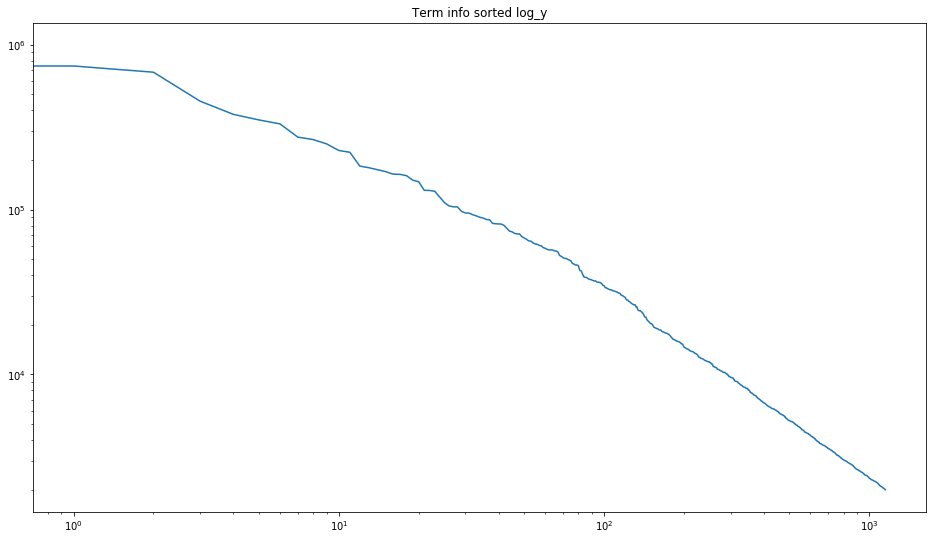

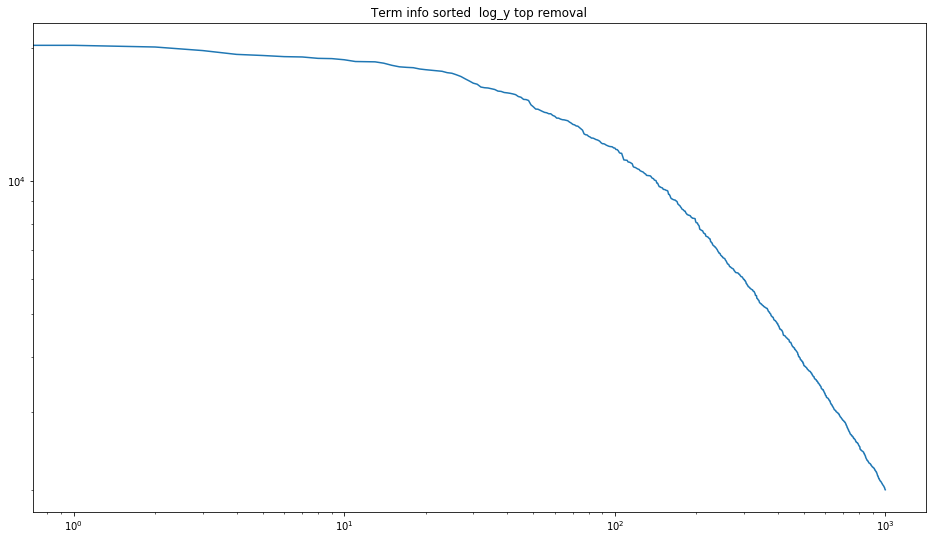

In [10]:
plt.figure(figsize=(16,9))
plt.yscale('log')
plt.xscale('log')
plt.plot(txt_info[indices])#[:500]])#top_n]])
plt.title("Term info sorted log_y")

plt.figure(figsize=(16,9))
plt.yscale('log')
plt.xscale('log')
plt.plot(txt_info[indices[150:]])#top_n]])
plt.title("Term info sorted  log_y top removal")

In [11]:
# freq_filt=n_grams_counts[:,indices[150:]]
# # indices[150:]

In [12]:
# df_out=pd.SparseDataFrame(freq_filt,
#                    columns=np.array(count_vect.get_feature_names())[indices[150:]],
#                    index=list(blog_data.index))
# df_out.fillna(0,inplace=True)

In [13]:
# usr_txt_frq=df_out.groupby(blog_data["id"],sort=False).sum()

In [14]:
# usr_txt_frq.sum()